In [89]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

In [90]:
frequency_sampling, audio_signal = wavfile.read("test3.wav")

C:\Users\fuadu\AppData\Local\Temp\ipykernel_15472\1049636108.py:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  frequency_sampling, audio_signal = wavfile.read("test3.wav")


In [91]:
audio_signal.shape[0]

187388

In [92]:
print('\nSignal shape:',audio_signal.shape)
print('Signal Datatype:',audio_signal.dtype)
print('Signal duration:' , round(audio_signal.shape[0]/float(frequency_sampling),2),'seconds')


Signal shape: (187388,)
Signal Datatype: int16
Signal duration: 3.9 seconds


In [93]:
audio_signal = audio_signal / np.power(2, 15)

In [94]:
audio_signal = audio_signal[:100]
time_axis = 1000*np.arange(0 , len(audio_signal),1)/float(frequency_sampling)

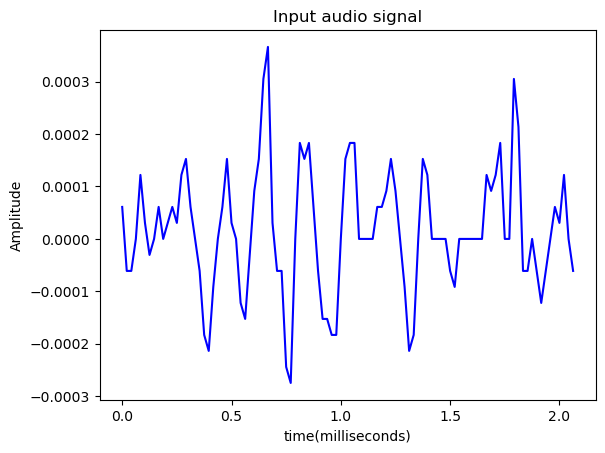

In [95]:
plt.plot(time_axis , audio_signal , color='blue')
plt.xlabel('time(milliseconds)')
plt.ylabel('Amplitude')
plt.title('Input audio signal')
plt.show()

In [96]:
length_signal = len(audio_signal)
half_length = np.ceil((length_signal+1) / 2.0).astype(np.int)

C:\Users\fuadu\AppData\Local\Temp\ipykernel_15472\3229282389.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  half_length = np.ceil((length_signal+1) / 2.0).astype(np.int)


In [97]:
signal_frequency = np.fft.fft(audio_signal)

In [98]:
signal_frequency = abs(signal_frequency[0:half_length]) / length_signal
signal_frequency **= 2

In [99]:
len_fts = len(signal_frequency)

In [100]:
if length_signal % 2:
    signal_frequency[1:len_fts] *= 2
else:
    signal_frequency[1:len_fts-1] *= 2

In [101]:
signal_power = 10*np.log10(signal_frequency)

In [102]:
x_axis = np.arange(0,half_length,1)*(frequency_sampling / length_signal) / 1000.0

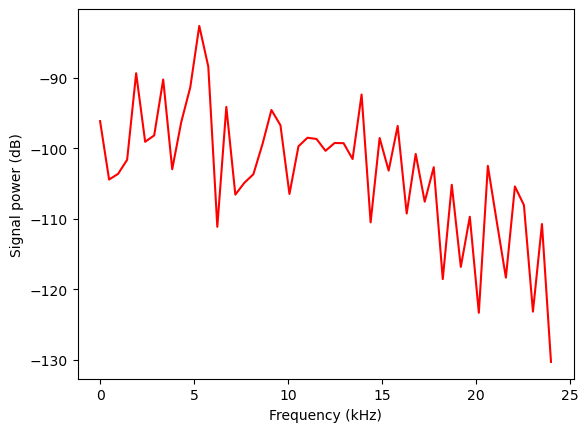

In [103]:
plt.figure()
plt.plot(x_axis, signal_power, color='red')
plt.xlabel('Frequency (kHz)')
plt.ylabel('Signal power (dB)')
plt.show()

In [118]:
!pip install SpeechRecognition

Defaulting to user installation because normal site-packages is not writeable


In [120]:
import speech_recognition as sr

ModuleNotFoundError: No module named 'speech_recognition'